In [1]:
import pickle
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
with open("../02-data/03-VSM/01-Word2Vec/word2vec-50.pkl", "rb") as f:
    document_vectors = pickle.load(f)
 
doc_paths = list(document_vectors.keys())  # File paths as labels
doc_vectors = np.array(list(document_vectors.values()))  # Convert dict to array

In [11]:
available_colors = list(plt.get_cmap("tab10").colors)  # 'tab10' provides 10 distinct colors

categories = [
    "batteries-non-rechargable-primary",
    "coaxial-cables-rf",
    "microphones",
    "cable-ties-and-zip-ties",
    "printers-label-makers"
]

# Assign each category a unique color dynamically
color_map = {category: available_colors[i % len(available_colors)] for i, category in enumerate(categories)}
color_map["default"] = "black"  # Fallback color

def get_category_color(path):
    """Determine color based on file path."""
    for category, color in color_map.items():
        if category in path:
            return color
    return color_map["default"]

In [ ]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(doc_vectors)

clustered_docs = dict(zip(doc_paths, cluster_labels))

for file_path in doc_paths:
    label_color = get_category_color(file_path)


In [19]:
sil_score = silhouette_score(doc_vectors, cluster_labels)
print(f"Silhouette Score: {sil_score}")

# Initialize an empty list to store true labels
true_labels = []

# Loop through each document path
for path in doc_paths:
    # Check if any of the categories are in the document path
    for category in categories:
        if category in path:
            true_labels.append(category)
            break  # Stop once the correct category is found

# Ensure that the true_labels list has the same length as the cluster_labels list
assert len(true_labels) == len(cluster_labels), "Mismatch between true labels and cluster labels length."

# Now you can compute the ARI score
ari_score = adjusted_rand_score(true_labels, cluster_labels)
# Evaluate with Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(true_labels, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari_score}")


Silhouette Score: 0.30462711697666833
Adjusted Rand Index (ARI): 0.374529125943385


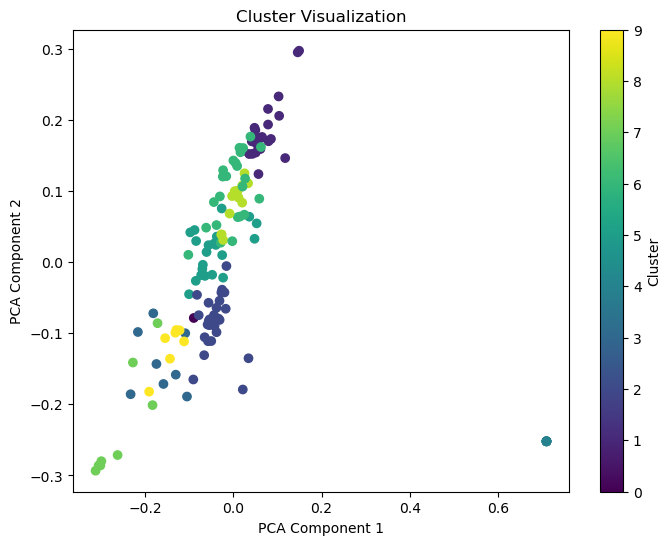

In [20]:
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(doc_vectors)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Cluster Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

---------------------

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import os
def extract_category(file_path: str) -> str:
    """
    Extracts the category from the given file path.
    
    Args:
        file_path (str): The path to extract the category from.
    
    Returns:
        str: The extracted category.
    """
    normalized_path = os.path.normpath(file_path)
    parts = normalized_path.split(os.sep)
    if len(parts) < 4:
        print("error here")
        return ""  # Return empty string if path structure is unexpected
    return parts[-2]  # Extract the second-to-last folder as the category


with open("../02-data/03-VSM/02-Glove/glove-5-50.pkl", "rb") as f:
    document_vectors = pickle.load(f)

# Assuming document_vectors is already loaded
doc_paths = list(document_vectors.keys())  # File paths as labels
doc_vectors = np.array(list(document_vectors.values()))  # Convert dict to array

y_labels = [extract_category(doc) for doc in doc_paths]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(doc_vectors, y, test_size=0.2, random_state=42)

# Train Logistic Regression classifier
clf = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7561


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Train and evaluate Support Vector Machine (SVM)
clf_svm = SVC(kernel='linear', C=1.0)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# Train and evaluate Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

SVM Accuracy: 0.7561
Random Forest Accuracy: 0.8537


In [3]:
import pandas as pd

data = pd.read_csv("../02-data/04-Classifier/preeliminary_classification.csv")
display(data)

,File,Classifier,Best Parameters,Accuracy
0,word2vec-5-50.pkl,Logistic Regression,"{'C': 10, 'max_iter': 500}",0.954545
1,word2vec-5-50.pkl,SVM,"{'C': 10, 'kernel': 'rbf'}",0.954545
2,word2vec-5-50.pkl,Random Forest,"{'max_depth': 20, 'n_estimators': 50}",0.931818
3,glove-5-50.pkl,Logistic Regression,"{'C': 10, 'max_iter': 500}",0.926829
4,glove-5-50.pkl,SVM,"{'C': 10, 'kernel': 'linear'}",0.951220
5,glove-5-50.pkl,Random Forest,"{'max_depth': 20, 'n_estimators': 50}",0.878049
6,fasttext-5-50.pkl,Logistic Regression,"{'C': 10, 'max_iter': 500}",0.804878
7,fasttext-5-50.pkl,SVM,"{'C': 10, 'kernel': 'rbf'}",0.878049
8,fasttext-5-50.pkl,Random Forest,"{'max_depth': None, 'n_estimators': 200}",0.926829
